In [4]:
import pandas as pd

df = pd.read_csv("data.csv")
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 502 non-null    object 
 1   Age                                    502 non-null    int64  
 2   Academic Pressure                      502 non-null    float64
 3   Study Satisfaction                     502 non-null    float64
 4   Sleep Duration                         502 non-null    object 
 5   Dietary Habits                         502 non-null    object 
 6   Have you ever had suicidal thoughts ?  502 non-null    object 
 7   Study Hours                            502 non-null    int64  
 8   Financial Stress                       502 non-null    int64  
 9   Family History of Mental Illness       502 non-null    object 
 10  Depression                             502 non-null    object 
dtypes: flo

In [6]:
df["Academic Pressure"].describe()
df["Depression"].value_counts()

,count
Depression,
Yes,252
No,250


In [7]:
bins = [0, 2, 4, 6, 8, 10]
labels = ["Very Low", "Low", "Moderate", "High", "Very High"]

df["Pressure_Bin"] = pd.cut(df["Academic Pressure"], bins=bins, labels=labels)
df["Pressure_Bin"].value_counts()


,count
Pressure_Bin,
Low,217
Very Low,187
Moderate,98
High,0
Very High,0


In [8]:
df["Academic Pressure"].min()
df["Academic Pressure"].max()
df["Academic Pressure"].unique()


array([2., 4., 1., 5., 3.])

In [9]:
bins = [0, 1.5, 2.5, 3.5, 4.5, 5.5]
labels = ["Very Low", "Low", "Moderate", "High", "Very High"]

df["Pressure_Bin"] = pd.cut(
    df["Academic Pressure"],
    bins=bins,
    labels=labels
)

df["Pressure_Bin"].value_counts().sort_index()


,count
Pressure_Bin,
Very Low,99
Low,88
Moderate,125
High,92
Very High,98


In [10]:
df["Pressure_Bin"].value_counts(normalize=True) * 100


,proportion
Pressure_Bin,
Moderate,24.900398
Very Low,19.721116
Very High,19.521912
High,18.326693
Low,17.529880


In [11]:
pd.crosstab(
    df["Pressure_Bin"],
    df["Depression"],
    normalize="index"
) * 100


Depression,No,Yes
Pressure_Bin,,
Very Low,82.828283,17.171717
Low,69.318182,30.681818
Moderate,49.600000,50.400000
High,32.608696,67.391304
Very High,15.306122,84.693878


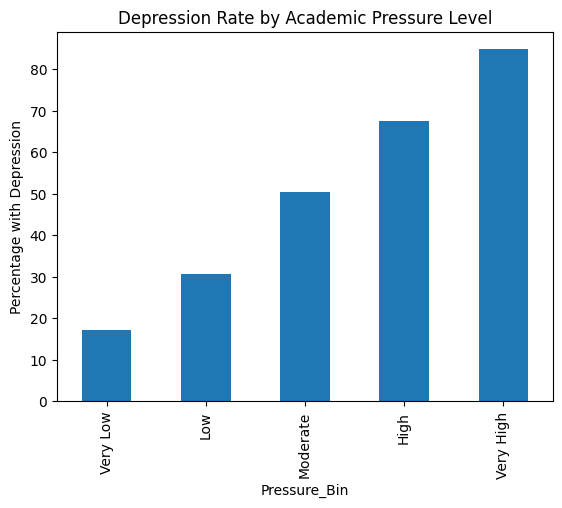

In [12]:
import matplotlib.pyplot as plt

depression_rates = pd.crosstab(
    df["Pressure_Bin"],
    df["Depression"],
    normalize="index"
) * 100

depression_rates["Yes"].plot(kind="bar")
plt.ylabel("Percentage with Depression")
plt.title("Depression Rate by Academic Pressure Level")
plt.show()


Students reporting higher amounts of academic pressure tend to be associated with higher levels of depression. The proportion of students who report depression from "Very Low" academic pressure to "Very High" academic pressure grows rapidly from ~17% to ~85%

In [13]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(
    df["Pressure_Bin"],
    df["Depression"]
)

chi2, p, dof, expected = chi2_contingency(contingency)

chi2, p


(np.float64(114.12908298162878), np.float64(9.57404620670226e-24))

In [14]:
import numpy as np

n = contingency.sum().sum()
cramers_v = np.sqrt(114.129 / (n * (min(contingency.shape) - 1)))
cramers_v


np.float64(0.47681086981914456)

A chi-square test indicated a significant association between academic pressure and depression (χ² = 114, p < 0.0001). The effect size, measured using Cramér’s V, was 0.48, indicating a moderate-to-strong association between higher academic pressure and reported depression.

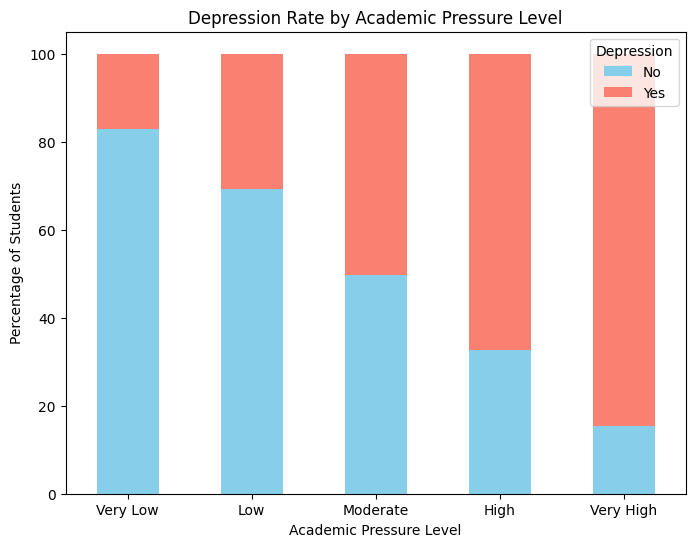

In [15]:
import matplotlib.pyplot as plt

# Proportions table
depression_rates = pd.crosstab(
    df["Pressure_Bin"],
    df["Depression"],
    normalize="index"
) * 100

# Plot
ax = depression_rates.plot(kind="bar", stacked=True, color=["skyblue", "salmon"], figsize=(8,6))
plt.ylabel("Percentage of Students")
plt.xlabel("Academic Pressure Level")
plt.title("Depression Rate by Academic Pressure Level")
plt.legend(title="Depression")
plt.xticks(rotation=0)
plt.show()


Students reporting higher levels of academic pressure show a substantially higher prevalence of depression. The proportion of students reporting depression rises sharply from ~17% in the “Very Low” category to ~85% in the “Very High” category. A chi-square test indicated a significant association between academic pressure and depression (p < 0.00001). These results suggest that higher academic pressure is strongly associated with depression, though causation cannot be inferred from this survey data.